In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#from sklearn.mixture import GaussianMixture

In [18]:
data = pd.read_csv("credit_card_data.csv")
cluster_data = data[['CUST_ID','PURCHASES_TRX','CASH_ADVANCE_TRX']]


In [19]:
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [20]:
cluster_data.fillna(0, inplace=True)

C:\Users\pathu\AppData\Local\Temp\ipykernel_3520\3847425099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data.fillna(0, inplace=True)


In [21]:
customer_ids = cluster_data['CUST_ID']
cluster_data = cluster_data.drop('CUST_ID',axis=1)

In [22]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

In [23]:
scaled_data

array([[-0.51133325, -0.47606982],
       [-0.59179588,  0.11007385],
       [-0.10902012, -0.47606982],
       ...,
       [-0.39063931, -0.47606982],
       [-0.59179588, -0.18299798],
       [ 0.33352433, -0.18299798]])

In [24]:
wcss = [] #within cluster sum of squares 
for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

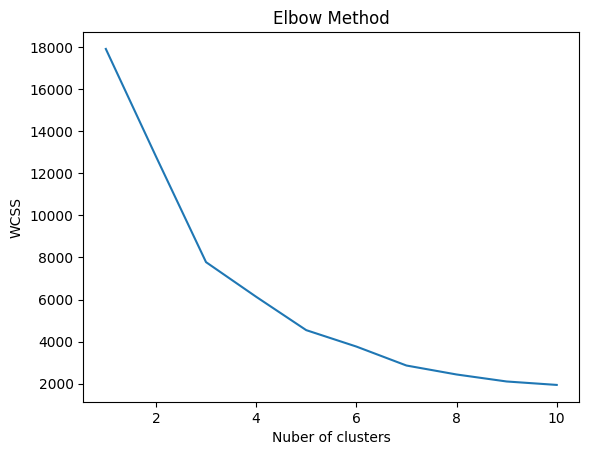

In [25]:
plt.plot(range(1,11), wcss) #within cluster sum of squares
plt.title('Elbow Method')
plt.xlabel('Nuber of clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
k=3
kmeans = KMeans (n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=42)

In [30]:
cluster_data['CLUSTER'] = kmeans.labels_
clustered_data = pd.concat([customer_ids, cluster_data], axis=1)

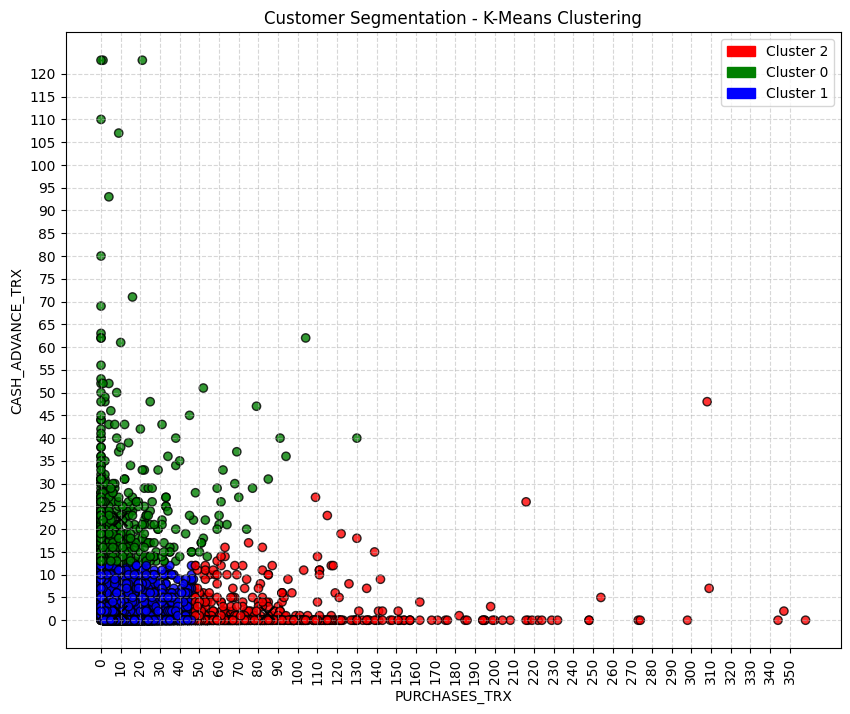

In [31]:
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
plt.figure(figsize=(10, 8))
cluster_numbers = clustered_data['CLUSTER'].unique()
cluster_colors = ['red', 'green', 'blue', 'orange', 'purple'][:len(cluster_numbers)]
custom_cmap = mcolors.ListedColormap(cluster_colors)
scatter = plt.scatter(clustered_data['PURCHASES_TRX'], clustered_data['CASH_ADVANCE_TRX'],
                      c=clustered_data['CLUSTER'], cmap=custom_cmap, alpha=0.8, edgecolor='k')
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=100, color='black', label='Centroids')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(np.arange(0, max(clustered_data['PURCHASES_TRX']) + 1, 10), rotation='vertical', ha='center')
plt.yticks(np.arange(0, max(clustered_data['CASH_ADVANCE_TRX']) + 1, 5))
plt.title('Customer Segmentation - K-Means Clustering')
plt.xlabel('PURCHASES_TRX')
plt.ylabel('CASH_ADVANCE_TRX')
legend_patches = [mpatches.Patch(color=cluster_colors[i], label='Cluster {}'.format(cluster_numbers[i]))
                  for i in range(len(cluster_numbers))]
plt.legend(handles=legend_patches)
plt.show()

In [32]:
from sklearn.metrics import silhouette_score
# Initialize variables
silhouette_scores = []
optimal_clusters = 0
best_score = -1
# Loop through cluster sizes and calculate silhouette score
for n_clusters in range(2, 11):  # Usually we start from 2 clusters since silhouette doesn't work well with 1
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    
    # Compute the average silhouette score
    score = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(score)
    
    # Track the best score and number of clusters
    if score > best_score:
        best_score = score
        optimal_clusters = n_clusters
print(f"The optimal number of clusters based on silhouette score is: {optimal_clusters}")

The optimal number of clusters based on silhouette score is: 3


In [33]:
cluster_2_ids = clustered_data[clustered_data['CLUSTER'] == 2]['CUST_ID'].tolist()
print(cluster_2_ids)

['C10001', 'C10002', 'C10003', 'C10004', 'C10005', 'C10006', 'C10008', 'C10009', 'C10010', 'C10011', 'C10012', 'C10013', 'C10014', 'C10015', 'C10016', 'C10017', 'C10018', 'C10019', 'C10020', 'C10021', 'C10023', 'C10025', 'C10026', 'C10027', 'C10028', 'C10030', 'C10032', 'C10033', 'C10034', 'C10035', 'C10036', 'C10037', 'C10038', 'C10039', 'C10040', 'C10041', 'C10043', 'C10044', 'C10045', 'C10046', 'C10047', 'C10048', 'C10049', 'C10051', 'C10053', 'C10054', 'C10055', 'C10056', 'C10057', 'C10058', 'C10059', 'C10060', 'C10061', 'C10062', 'C10063', 'C10064', 'C10065', 'C10068', 'C10069', 'C10070', 'C10071', 'C10072', 'C10073', 'C10075', 'C10077', 'C10078', 'C10079', 'C10080', 'C10081', 'C10082', 'C10083', 'C10084', 'C10085', 'C10086', 'C10087', 'C10089', 'C10093', 'C10095', 'C10097', 'C10098', 'C10099', 'C10100', 'C10101', 'C10102', 'C10103', 'C10104', 'C10105', 'C10106', 'C10108', 'C10109', 'C10110', 'C10111', 'C10113', 'C10115', 'C10116', 'C10118', 'C10119', 'C10120', 'C10121', 'C10122',

In [34]:
cluster_4_ids = clustered_data[clustered_data['CLUSTER'] == 4]['CUST_ID'].tolist()
print(cluster_4_ids)

[]
